# Exercises Discriminant Analysis

In [2]:
import pandas as pd                                                     # Data manipulation
import numpy as np                                                      # Scientific computing
import matplotlib.pyplot as plt                                         # Data visualization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    # Discriminant Analysis


def LDA_coefficients(X,lda):
    nb_col = X.shape[1]
    matrix= np.zeros((nb_col+1,nb_col), dtype=int)
    Z=pd.DataFrame(data=matrix,columns=X.columns)
    for j in range(0,nb_col):
        Z.iloc[j,j] = 1
    LD = lda.transform(Z)
    nb_funct= LD.shape[1]
    resultaat = pd.DataFrame();
    index = ['const']
    for j in range(0,LD.shape[0]-1):
        index = np.append(index,'C'+str(j+1))
    for i in range(0,LD.shape[1]):
        coef = [LD[-1][i]]
        for j in range(0,LD.shape[0]-1):
            coef = np.append(coef,LD[j][i]-LD[-1][i])
        result = pd.Series(coef)
        result.index = index
        column_name = 'LD' + str(i+1)
        resultaat[column_name] = result
    return resultaat

C:\Users\elias\AppData\Local\Temp\ipykernel_26864\1070491525.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                                     # Data manipulation


## Theoretical questions

### Question 1:
- Kan je de schrijfhand van volgende student voorspellen op basis van de opgegeven lengte (`182`), stukken fruit (`2`), schoenmaat (`44`), afstand tot KdG (`22`)? Gebruik enkel de studenten die Links of Rechts als schrijfhand hebben opgegeven.
- Stel een confusion matrix op op basis van de voorspelde en de effectieve waarden voor de data die je gebruikt hebt om de discriminantanalyse uit te voeren (zie 1).
- Bereken de gebruikelijke evaluatie metrieken voor een binaire classificator.
- Teken de ROC-curve. Verklaar –indien van toepassing-waarom de ROC-curve niet wordt getekend.

- Wat is de accuracy van de discriminantanalyse waar de lengte en de schoenmaat het aantal broers en zussen voorspelt?

In [3]:
data1 = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
display(data1.head())

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren


In [4]:
# 1
X = data1[['lengte', 'stukken fruit', 'schoenmaat', 'afstand tot KdG']]
y = data1['schrijfhand']
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

testdata = pd.DataFrame(data={'lengte': [182], 'stukken fruit': [2], 'schoenmaat': [44], 'afstand tot KdG': [22]})
print(lda.predict(testdata))
print(lda.predict_proba(testdata))

['Rechts']
[[0.09459903 0.90540097]]


In [5]:
# 2
predicted = pd.Series(lda.predict(X), name='predicted')
actual = y.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='all', margins_name='total')
print(confusion_matrix)

predicted  Links  Rechts  total
actual                         
Links          1      13     14
Rechts         1      74     75
total          2      87     89


### Question 2:
- Zoek in de Canvas-cursus de dataset `Bordeaux` en plaats die in een dataframe.
    - Pas een discriminantanalyse toe op deze data set waarbij quality als afhankelijke variabele optreedt en `temperature`, `sun`, `heat` en `rain` als de onafhankelijke variabelen.
    - Hoeveel dimensies heeft de discriminantanalyse?
    - Maak een plot van de resultaten van de discriminantanalyse. Wat wordt er hier gevisualiseerd?
    - Pas het predict commando even toe op de oorspronkelijke gegevens. Hoeveel percent van de wijnen krijgen dezelfde label opgeplakt via de discriminantanalyse als geobserveerd?

In [6]:
bordeaux = pd.read_csv('../Data/Bordeaux.csv', delimiter=';', decimal=',')
display(bordeaux.head())

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good


In [7]:
# 1
X = bordeaux[['temperature', 'sun', 'heat', 'rain']]
y = bordeaux['quality']
lda = LinearDiscriminantAnalysis()
print(lda.fit(X, y))

LinearDiscriminantAnalysis()


In [8]:
# 2
print(y.unique())
print(len(y.unique()))

['medium' 'bad' 'good']
3


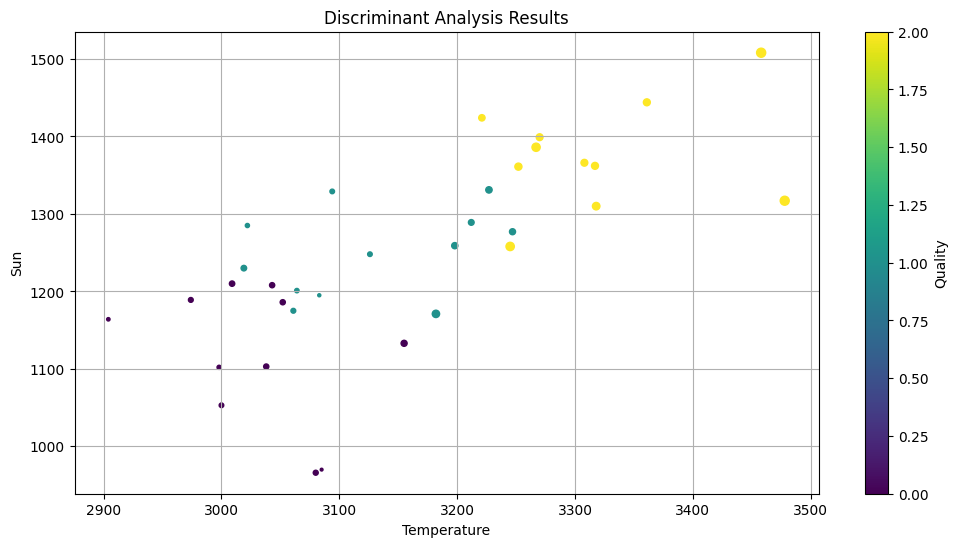

In [9]:
# 3
quality_mapping = {'bad': 0, 'medium': 1, 'good': 2}
bordeaux['quality_code'] = bordeaux['quality'].map(quality_mapping)
y2 = bordeaux['quality_code']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y2)

plt.figure(figsize=(12, 6))

plt.scatter(X['temperature'], X['sun'], X['heat'], c=lda.predict(X), cmap='viridis')
plt.colorbar(label='Quality')
plt.xlabel('Temperature')
plt.ylabel('Sun')
plt.title('Discriminant Analysis Results')

plt.grid(True)
plt.show()

In [10]:
# 4
predicted = lda.predict(X)
print(f"Percentage of wines with the same label: {np.mean(predicted == y) * 100:.2f}%")

Percentage of wines with the same label: 0.00%


### Question 3:
- Zoek in de Canvas-cursus de dataset `Birthwt` en plaats die in een dataframe.
    - Analyseer het type van gegevens in deze dataset.
    - Welke kolommen kunnen er als afhankelijke variabele voor een discriminant analyse worden gebruikt?
    - Welke kolommen kunnen er als onafhankelijke variabelen voor een discriminant analyse worden gebruikt?
    - Pas een discriminantanalyse toe op deze data set (maakt gebruik van je keuzes hierboven).
    - Hoeveel dimensies heeft de discriminantanalyse?
    - Maak een plot van de resultaten van de discriminantanalyse.



In [11]:
birthwt = pd.read_csv('../Data/Birthwt.csv', delimiter=';', decimal=',')
display(birthwt.head())

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [12]:
# 1
print(birthwt.dtypes)

low      int64
age      int64
lwt      int64
race     int64
smoke    int64
ptl      int64
ht       int64
ui       int64
ftv      int64
bwt      int64
dtype: object


In [19]:
# 2

In [20]:
# 3

In [21]:
# 4

In [12]:
# 5

In [12]:
# 6

### Question 4:
- Zoek op Canvas de dataset `Cars93` en plaats die in een dataframe.
    - Analyseer de type van gegevens in deze dataset.
    - Splits de data set in twee: de eerste `90` rijen als ‘leer data set’ waarom je een discriminant analyse gaat toepassen (zie 5) en de laatste 3 rijen om na te gaan of de bekomen discriminant analyse deze auto’s in de juiste klasse plaatst (zie 7).
    - Welke kolommen kunnen er als afhankelijke variabele voor een discriminant analyse worden gebruikt?
    - Welke kolommen kunnen er als onafhankelijke variabelen voor een discriminant analyse worden gebruikt?
    - Pas een discriminantanalyse toe op deze data set. Neem als afhankelijke variabele de kolom Type en als onafhankelijke variabelen alle bruikbare kolommen (zie 4).
    - Hoeveel dimensies heeft de discriminantanalyse?
    - Pas de bekomen discriminantanalyse met behulp van predict-commando toe op de laatste 3 rijen van de oorspronkelijke gegevens (zie 2). Worden alle 3 de wagens in de juiste klasse geplaatst?

In [13]:
cars93 = pd.read_csv('../Data/Cars93.csv', delimiter=';', decimal='.')
display(cars93.head())

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [14]:
# 1